In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import quantecon as qe
import numpy as np

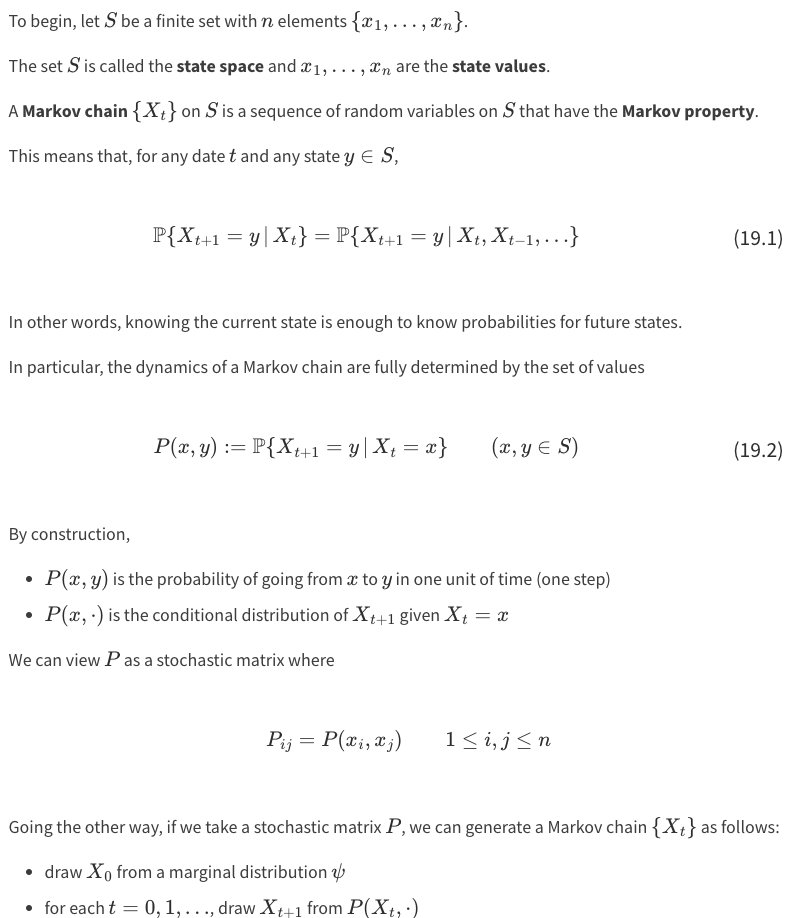

In [2]:
ψ = (0.3, 0.7)           # probabilities over {0, 1}
cdf = np.cumsum(ψ)       # convert into cummulative distribution
tirages = qe.random.draw(cdf, 5)   # generate 5 independent draws from ψ
print(tirages)
tirages = qe.random.draw(cdf, 1000)   # generate 5 independent draws from ψ
print(tirages.mean())

[1 0 1 1 0]
0.702


In [5]:
def mc_sample_path(P, ψ_0=None, sample_size=1_000):

    # set up
    P = np.asarray(P)
    X = np.empty(sample_size, dtype=int)

    # Convert each row of P into a cdf
    n = len(P)
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]

    # draw initial state, defaulting to 0
    if ψ_0 is not None:
        X_0 = qe.random.draw(np.cumsum(ψ_0))
    else:
        X_0 = 0

    # simulate
    X[0] = X_0
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])

    return X

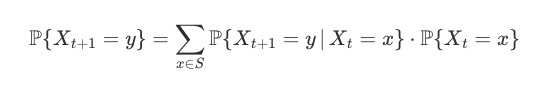

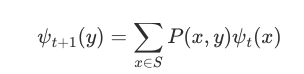

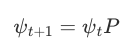

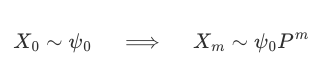

In [6]:
P = [[0.4, 0.6],
     [0.2, 0.8]]
X = mc_sample_path(P, ψ_0=[0.1, 0.9], sample_size=100_000)
mean_X = np.mean(X == 0)
print(mean_X)


0.25106


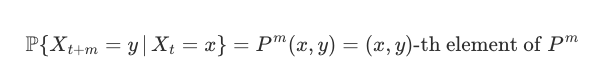

In [7]:
mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1_000_000)
np.mean(X == 0)


0.248825

In [8]:
%time mc_sample_path(P, sample_size=1_000_000) # Our homemade code version

CPU times: user 1.06 s, sys: 10.6 ms, total: 1.07 s
Wall time: 1.09 s


array([0, 1, 1, ..., 1, 1, 1])

In [9]:
%time mc.simulate(ts_length=1_000_000) # qe code version

CPU times: user 32.2 ms, sys: 9.61 ms, total: 41.8 ms
Wall time: 41.8 ms


array([1, 1, 0, ..., 1, 0, 1])

In [10]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length=4, init='employed')

array(['employed', 'employed', 'unemployed', 'unemployed'], dtype='<U10')

In [11]:
mc.simulate(ts_length=4)

array(['unemployed', 'employed', 'employed', 'employed'], dtype='<U10')

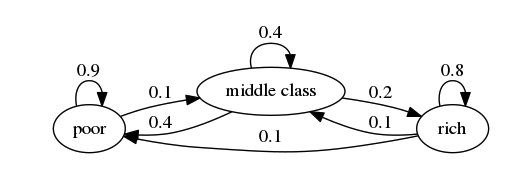

In [12]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

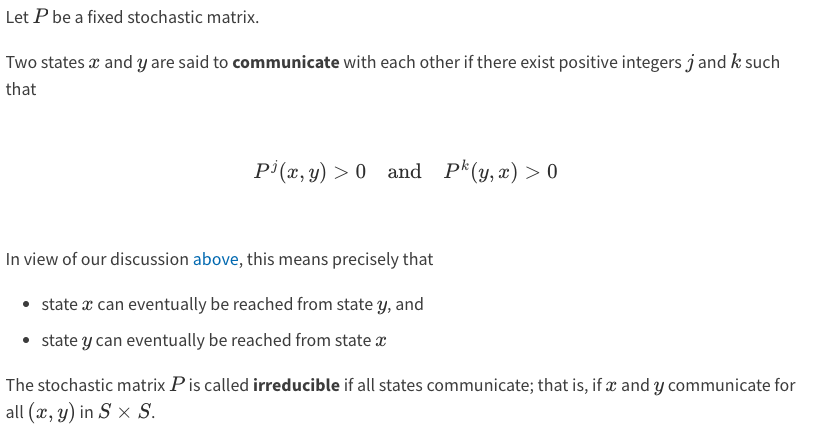

In [13]:
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible


False

In [14]:
mc.communication_classes

[array(['poor'], dtype='<U6'), array(['middle', 'rich'], dtype='<U6')]

In [15]:
P = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

mc = qe.MarkovChain(P)
mc.period

3

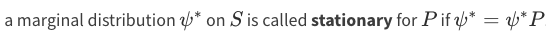

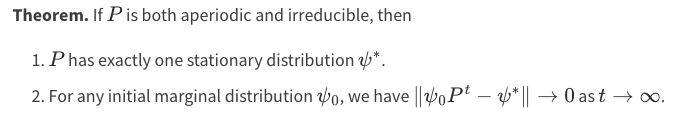

In [16]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

mc = qe.MarkovChain(P)
mc.stationary_distributions 

array([[0.25, 0.75]])

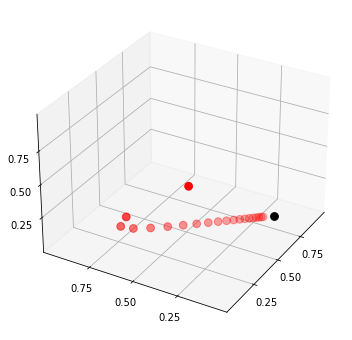

In [17]:
P = ((0.971, 0.029, 0.000),
     (0.145, 0.778, 0.077),
     (0.000, 0.508, 0.492))
P = np.array(P)

ψ = (0.0, 0.2, 0.8)        # Initial condition

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlim=(0, 1), ylim=(0, 1), zlim=(0, 1),
       xticks=(0.25, 0.5, 0.75),
       yticks=(0.25, 0.5, 0.75),
       zticks=(0.25, 0.5, 0.75))

x_vals, y_vals, z_vals = [], [], []
for t in range(20):
    x_vals.append(ψ[0])
    y_vals.append(ψ[1])
    z_vals.append(ψ[2])
    ψ = ψ @ P

ax.scatter(x_vals, y_vals, z_vals, c='r', s=60)
ax.view_init(30, 210)

mc = qe.MarkovChain(P)
ψ_star = mc.stationary_distributions[0]
ax.scatter(ψ_star[0], ψ_star[1], ψ_star[2], c='k', s=60)

plt.show()

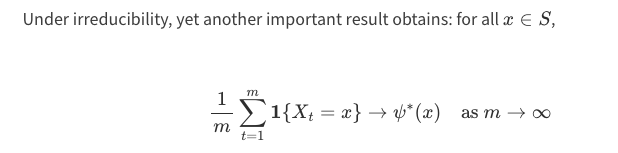

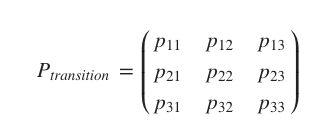

In [20]:
import numpy as np
p_init = np.array([0.1, 0.8, 0.1])
p_init

array([0.1, 0.8, 0.1])

In [21]:
p_transition = np.array(
    [[0.90, 0.05, 0.05],
     [0.01, 0.90, 0.09],
     [0.07, 0.03, 0.9]]
)
p_transition

array([[0.9 , 0.05, 0.05],
       [0.01, 0.9 , 0.09],
       [0.07, 0.03, 0.9 ]])

In [22]:
assert p_transition[0, :].sum() == 1
assert p_transition[1, :].sum() == 1
assert p_transition[2, :].sum() == 1

In [24]:
p_next = p_init @ p_transition
p_next

array([0.105, 0.728, 0.167])

In [26]:
p_next = p_next @ p_transition
p_next

array([0.11347, 0.66546, 0.22107])

In [27]:
p_state_t = [p_init]

for i in range(200):  # 200 time steps sorta, kinda, approximates infinite time :)
    p_state_t.append(p_state_t[-1] @ p_transition)

In [28]:
import pandas as pd

state_distributions = pd.DataFrame(p_state_t)
state_distributions

,0,1,2
0,0.100000,0.800000,0.100000
1,0.105000,0.728000,0.167000
2,0.113470,0.665460,0.221070
3,0.124253,0.611220,0.264528
4,0.136456,0.564246,0.299297
...,...,...,...
196,0.313305,0.278970,0.407725
197,0.313305,0.278970,0.407725
198,0.313305,0.278970,0.407725
199,0.313305,0.278970,0.407725


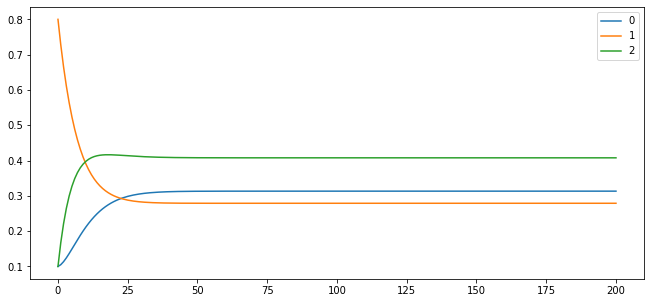

In [29]:
import matplotlib.pyplot as plt
state_distributions.plot();

In [31]:
def equilibrium_distribution(p_transition):
    n_states = p_transition.shape[0]
    A = np.append(
        arr=p_transition.T - np.eye(n_states),
        values=np.ones(n_states).reshape(1, -1),
        axis=0
    )
    b = np.transpose(np.array([0] * n_states + [1]))
    p_eq = np.linalg.solve(
        a=np.transpose(A).dot(A),
        b=np.transpose(A).dot(b)
    )
    return p_eq

# alternative
def equilibrium_distribution(p_transition):
    """This implementation comes from Colin Carroll, who kindly reviewed the notebook"""
    n_states = p_transition.shape[0]
    A = np.append(
        arr=p_transition.T - np.eye(n_states),
        values=np.ones(n_states).reshape(1, -1),
        axis=0
    )
    # Moore-Penrose pseudoinverse = (A^TA)^{-1}A^T
    pinv = np.linalg.pinv(A)
    # Return last row
    return pinv.T[-1]


print(equilibrium_distribution(p_transition))

[0.31330472 0.27896996 0.40772532]


In [32]:
from scipy.stats import multinomial
from typing import List

def markov_sequence(p_init: np.array, p_transition: np.array, sequence_length: int) -> List[int]:
    """
    Generate a Markov sequence based on p_init and p_transition.
    """
    if p_init is None:
        p_init = equilibrium_distribution(p_transition)
    initial_state = list(multinomial.rvs(1, p_init)).index(1)

    states = [initial_state]
    for _ in range(sequence_length - 1):
        p_tr = p_transition[states[-1]]
        new_state = list(multinomial.rvs(1, p_tr)).index(1)
        states.append(new_state)
    return states

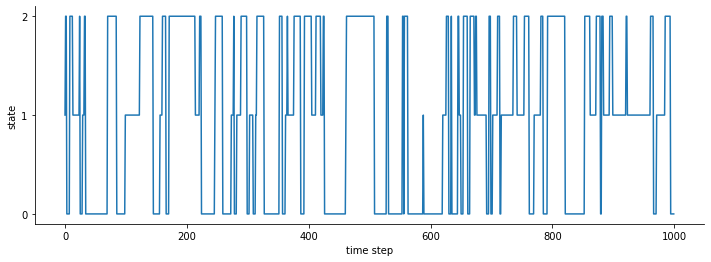

In [33]:
import seaborn as sns

states = markov_sequence(p_init, p_transition, sequence_length=1000)
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(states)
plt.xlabel("time step")
plt.ylabel("state")
plt.yticks([0, 1, 2])
sns.despine()

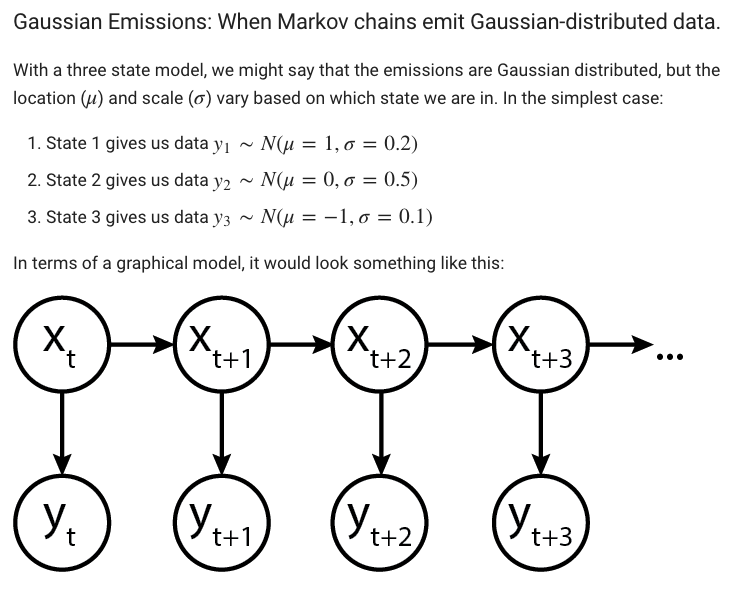

In [34]:
from scipy.stats import norm

def gaussian_emissions(states: List[int], mus: List[float], sigmas: List[float]) -> List[float]:
    emissions = []
    for state in states:
        loc = mus[state]
        scale = sigmas[state]
        e = norm.rvs(loc=loc, scale=scale)
        emissions.append(e)
    return emissions

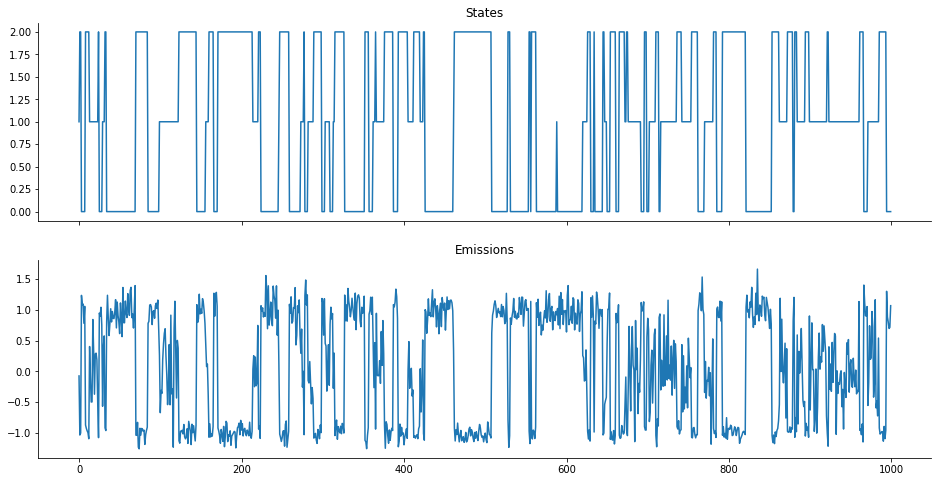

In [35]:
gaussian_ems = gaussian_emissions(states, mus=[1, 0, -1], sigmas=[0.2, 0.5, 0.1])

def plot_emissions(states, emissions):
    fig, axes = plt.subplots(figsize=(16, 8), nrows=2, ncols=1, sharex=True)

    axes[0].plot(states)
    axes[0].set_title("States")
    axes[1].plot(emissions)
    axes[1].set_title("Emissions")
    sns.despine();

plot_emissions(states, gaussian_ems)

In [36]:
from scipy.stats import poisson
def poisson_emissions(states: List[int], lam: List[float]) -> List[int]:
    emissions = []
    for state in states:
        rate = lam[state]
        e = poisson.rvs(rate)
        emissions.append(e)
    return emissions

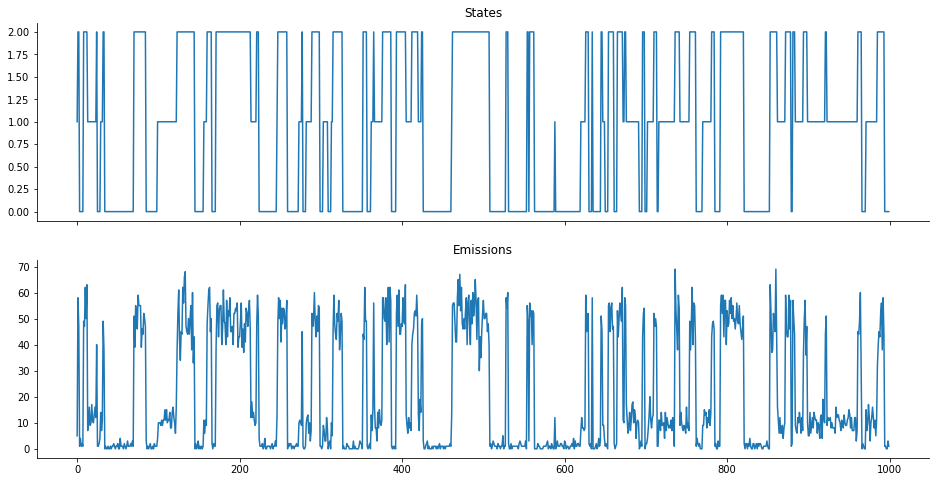

In [37]:
poisson_ems = poisson_emissions(states, lam=[1, 10, 50])
plot_emissions(states, poisson_ems)

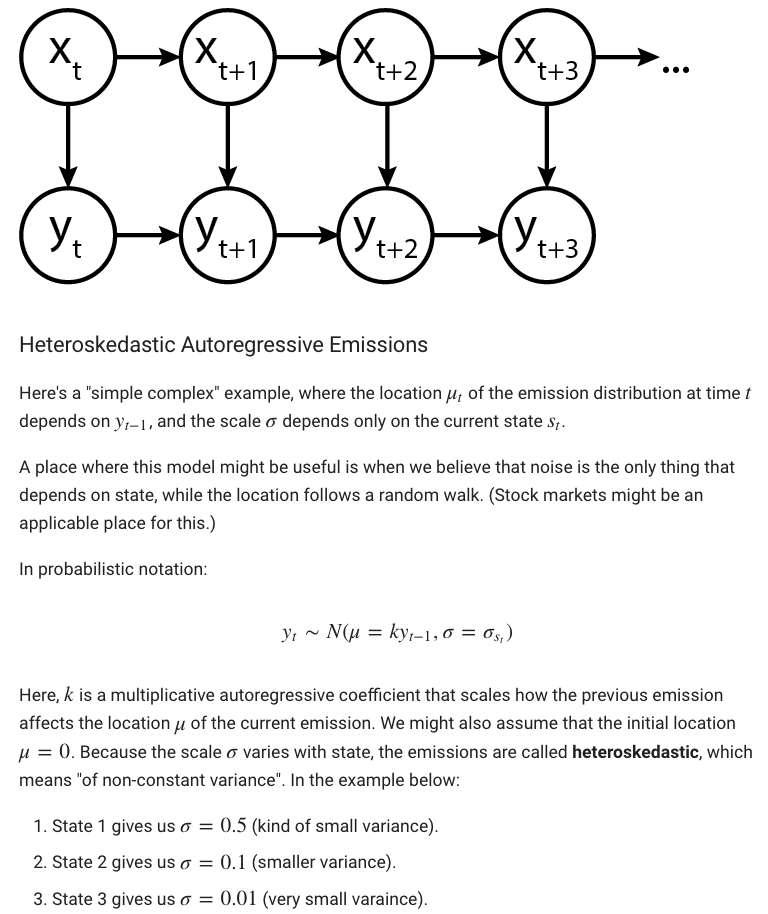

In [38]:
def ar_gaussian_heteroskedastic_emissions(states: List[int], k: float, sigmas: List[float]) -> List[float]:
    emissions = []
    prev_loc = 0
    for state in states:
        e = norm.rvs(loc=k * prev_loc, scale=sigmas[state])
        emissions.append(e)
        prev_loc = e
    return emissions


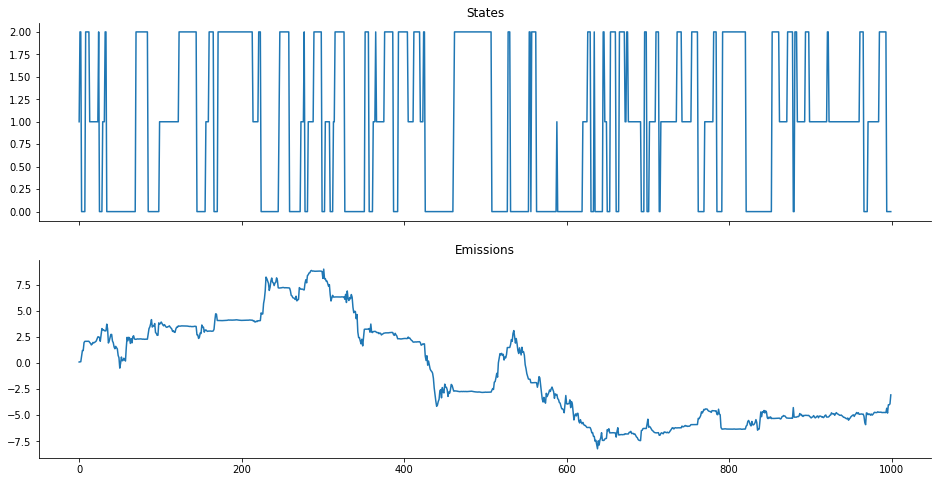

In [39]:
ar_het_ems = ar_gaussian_heteroskedastic_emissions(states, k=1, sigmas=[0.5, 0.1, 0.01])
plot_emissions(states, ar_het_ems)

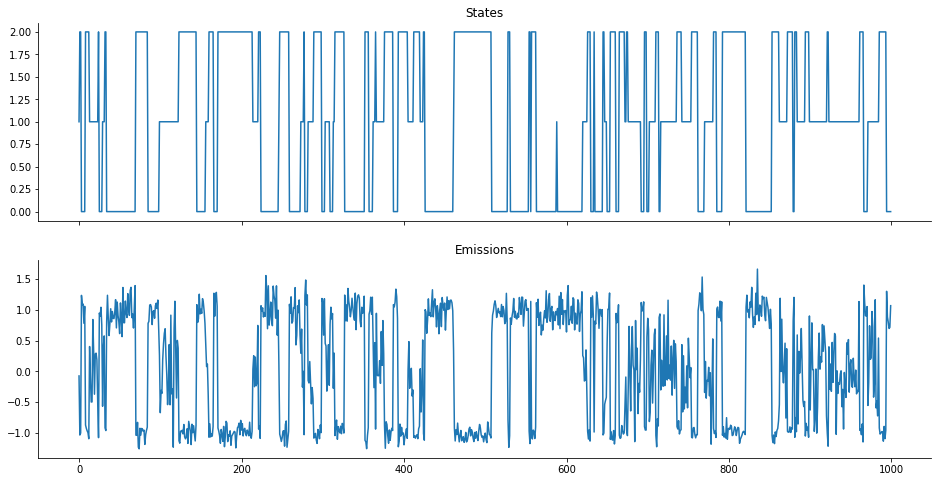

In [40]:
plot_emissions(states, gaussian_ems)

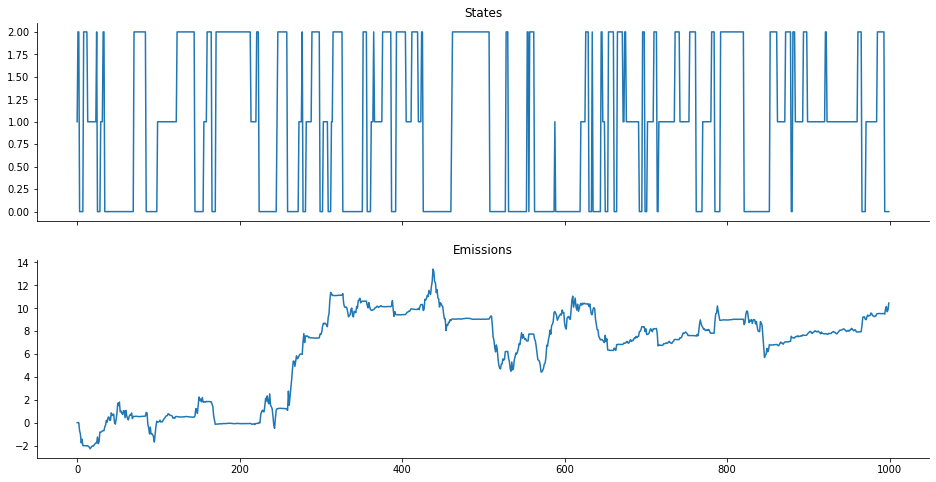

In [41]:
ar_het_ems = ar_gaussian_heteroskedastic_emissions(states, k=1, sigmas=[0.5, 0.1, 0.01])
plot_emissions(states, ar_het_ems)

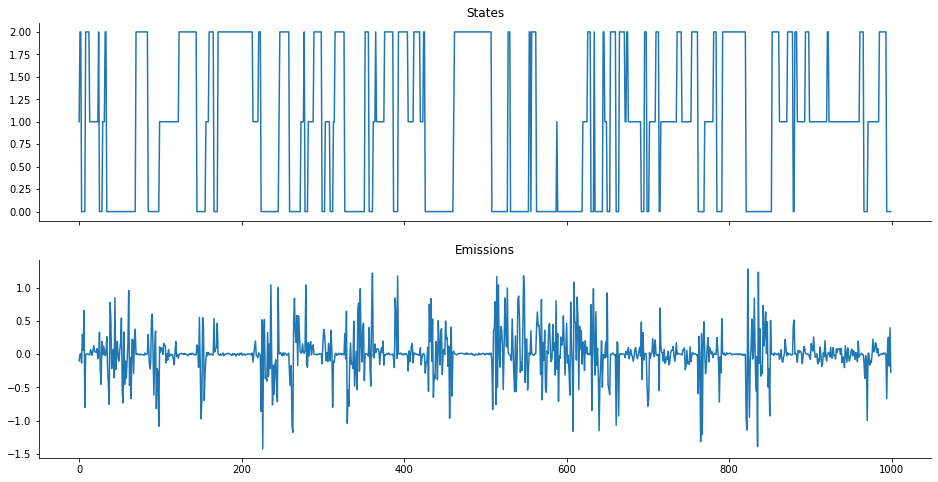

In [42]:
ar_het_ems = ar_gaussian_heteroskedastic_emissions(states, k=0, sigmas=[0.5, 0.1, 0.01])
plot_emissions(states, ar_het_ems)
